## Задание 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

from sklearn.datasets import load_boston

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
boston = load_boston()

In [4]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y = pd.DataFrame(boston['target'], columns=["price"])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [9]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [10]:
from sklearn.manifold import TSNE

In [11]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne.shape

(404, 2)

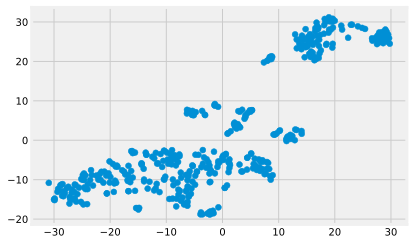

In [12]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

## Задание 2

In [13]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)

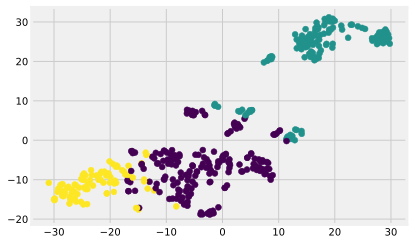

In [14]:
labels_train = model.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [15]:
print('Цена в 1-м кластере: {}'.format(y_train[labels_train == 0].mean()))
print('Цена во 2-м кластере: {}'.format(y_train[labels_train == 1].mean()))
print('Цена в 3-м кластере: {}'.format(y_train[labels_train == 2].mean()))

Цена в 1-м кластере: price    24.971204
dtype: float64
Цена во 2-м кластере: price    16.179688
dtype: float64
Цена в 3-м кластере: price    27.874118
dtype: float64


In [16]:
print('Криминальность в 1-м кластере: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Криминальность во 2-м кластере: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Криминальность в 3-м кластере: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Криминальность в 1-м кластере: 0.42098554973821994
Криминальность во 2-м кластере: 10.7152190625
Криминальность в 3-м кластере: 0.0721184705882353


Видно, что криминальность во 2-м кластере на порядок больше, чем в 1-м и 3-м кластерах, и цена на недвижимость во втором кластере соответственно намного ниже.

## Задание 3

In [17]:
labels_test = model.predict(X_test_scaled)

In [18]:
print('Цена в 1-м кластере: {}'.format(y_test[labels_test == 0].mean()))
print('Цена во 2-м кластере: {}'.format(y_test[labels_test == 1].mean()))
print('Цена в 3-м кластере: {}'.format(y_test[labels_test == 2].mean()))

Цена в 1-м кластере: price    21.860784
dtype: float64
Цена во 2-м кластере: price    16.437143
dtype: float64
Цена в 3-м кластере: price    31.35
dtype: float64


In [19]:
print('Криминальность в 1-м кластере: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Криминальность во 2-м кластере: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Криминальность в 3-м кластере: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Криминальность в 1-м кластере: 0.2660788235294118
Криминальность во 2-м кластере: 10.165531142857143
Криминальность в 3-м кластере: 0.06206
